# Wilcoxon Test

معادل تی تست ها 

## One-sample Wilcoxon signed rank test
### One sample t test

In [19]:
library(readxl)
library(rstatix)
library(ggpubr)
library(lawstat)

In [5]:
GoNoGO_bias_OneGroup = read_excel("D://Amar//Codes_Data//GoNoGo_bias_OneGroup.xlsx")

In [6]:
GoNoGO_bias_OneGroup

subj,bias
<dbl>,<dbl>
1,0.63
2,0.77
3,0.73
4,0.72
5,0.57
6,0.52
7,0.78
8,0.72
9,0.75


In [11]:
GoNoGO_bias_OneGroup %>% get_summary_stats(bias, type ="median_iqr")

variable,n,median,iqr
<fct>,<dbl>,<dbl>,<dbl>
bias,12,0.725,0.15


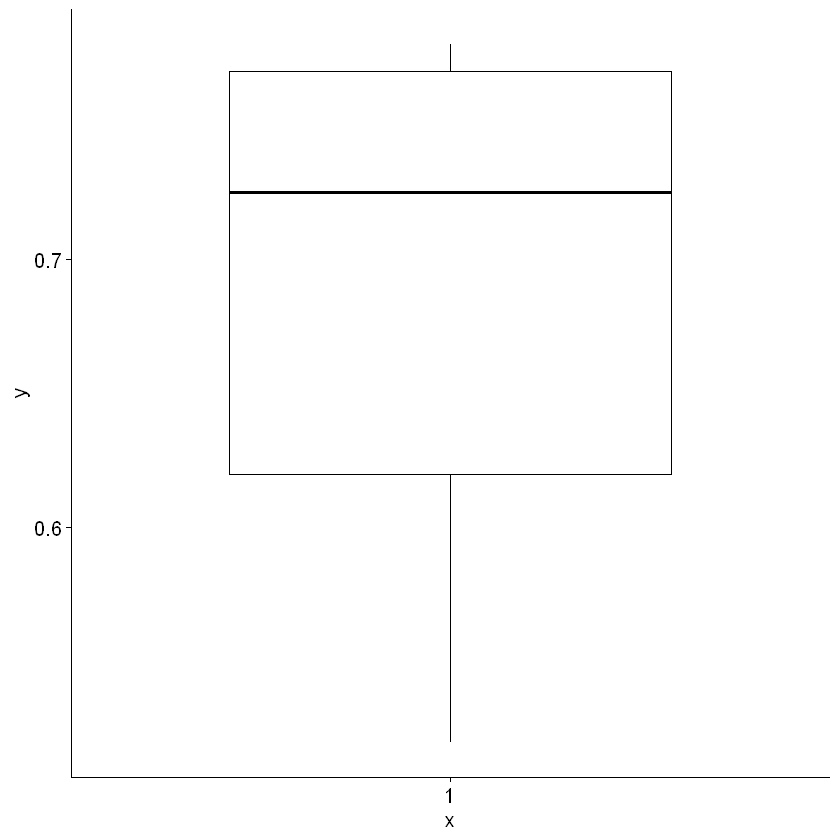

In [14]:
ggboxplot(GoNoGO_bias_OneGroup$bias)

### Mean is biased towards Go answer

In [15]:
GoNoGO_bias_OneGroup %>% identify_outliers(bias)

subj,bias,is.outlier,is.extreme
<dbl>,<dbl>,<lgl>,<lgl>


In [16]:
GoNoGO_bias_OneGroup %>% shapiro_test(bias)

variable,statistic,p
<chr>,<dbl>,<dbl>
bias,0.844051,0.03102369


#### P value is less than 0.05, so distribution is not normal.

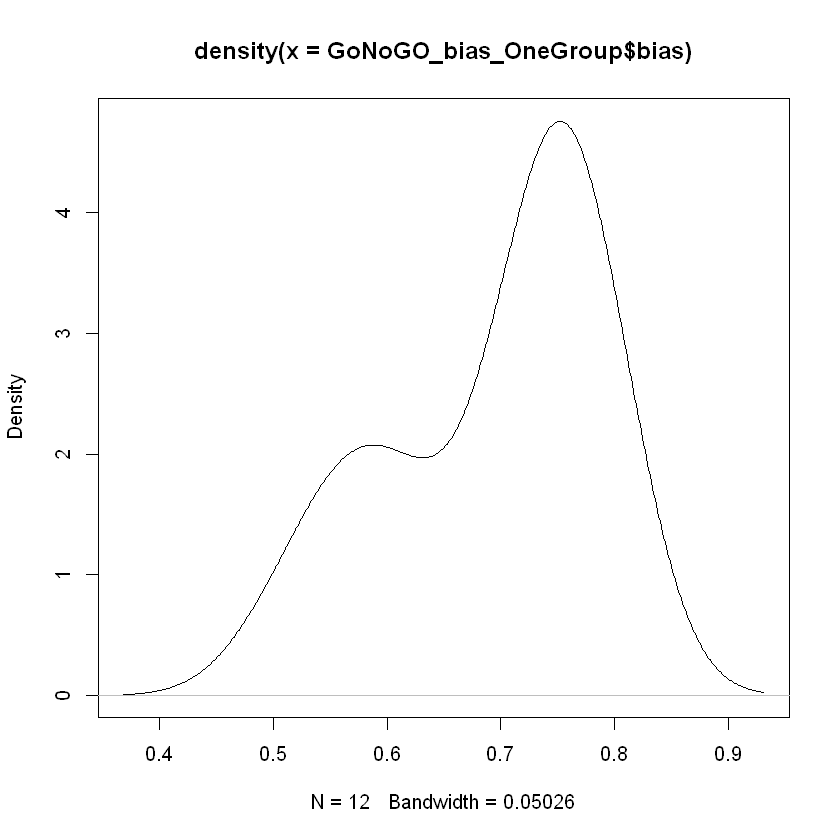

In [17]:
plot(density(GoNoGO_bias_OneGroup$bias))

#### From the data plot it's obvious that distribution is not indeed normal.

In [20]:
symmetry.test(GoNoGO_bias_OneGroup$bias)


	m-out-of-n bootstrap symmetry test by Miao, Gel, and Gastwirth (2006)

data:  GoNoGO_bias_OneGroup$bias
Test statistic = -1.6308, p-value = 0.344
alternative hypothesis: the distribution is asymmetric.
sample estimates:
bootstrap optimal m 
                 11 


#### Distribution is Symmetric

In [22]:
GoNoGO_bias_OneGroup %>% wilcox_test(bias ~ 1, mu = 0.5)

,.y.,group1,group2,n,statistic,p
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,bias,1,null model,12,78,0.0025


#### Null hypothesis is too small so null hypothesis is not correct.

In [24]:
GoNoGO_bias_OneGroup %>% wilcox_effsize(bias ~ 1, mu = 0.5)

,.y.,group1,group2,effsize,n,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<ord>
1,bias,1,null model,0.8841969,12,large


## Wilcoxon rank sum test

### Two sample independent t test


In [28]:
GoNoGo_ADHD_bias = read_excel("D://Amar//Codes_Data//GoNoGo_ADHD_bias.xlsx")

In [29]:
GoNoGo_ADHD_bias

id,group,bias
<dbl>,<chr>,<dbl>
1,Normal,0.43
2,Normal,0.57
3,Normal,0.53
4,Normal,0.52
5,Normal,0.37
6,Normal,0.37
7,Normal,0.58
8,Normal,0.52
9,Normal,0.45


In [30]:
GoNoGo_ADHD_bias %>% group_by(group) %>% get_summary_stats(bias, type = "median_iqr")

group,variable,n,median,iqr
<chr>,<fct>,<dbl>,<dbl>,<dbl>
ADHD,bias,22,0.77,0.12
Normal,bias,22,0.52,0.12


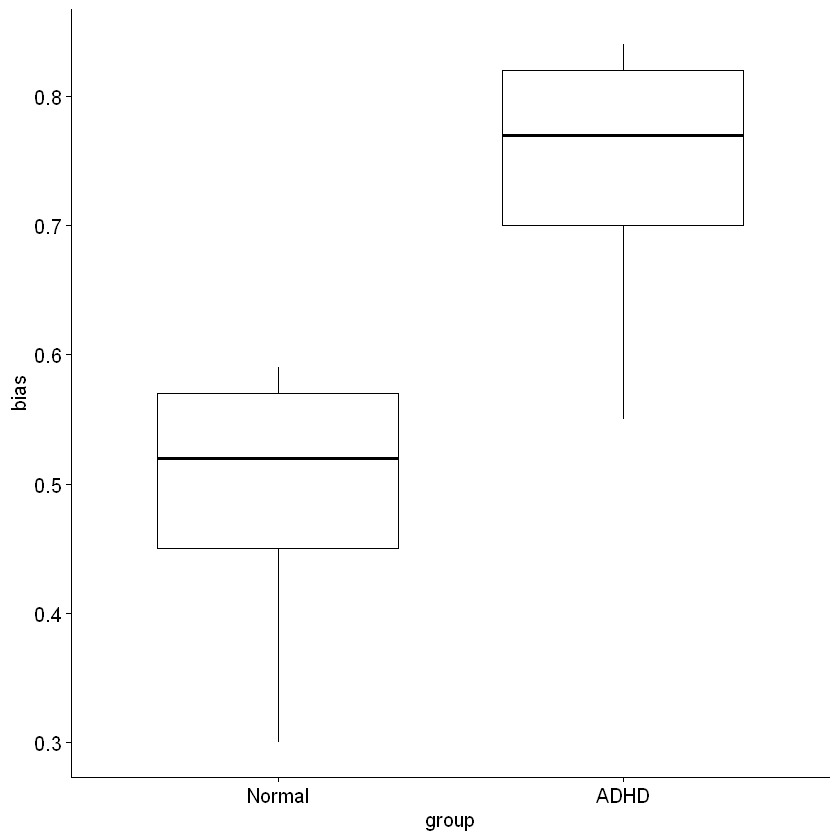

In [32]:
ggboxplot(GoNoGo_ADHD_bias, x="group", y="bias")

In [33]:
GoNoGo_ADHD_bias %>% group_by(group) %>% identify_outliers(bias)

group,id,bias,is.outlier,is.extreme
<chr>,<dbl>,<dbl>,<lgl>,<lgl>


In [34]:
GoNoGo_ADHD_bias %>% group_by(group) %>% shapiro_test(bias)

group,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
ADHD,bias,0.9029851,0.03412215
Normal,bias,0.9013495,0.03163484


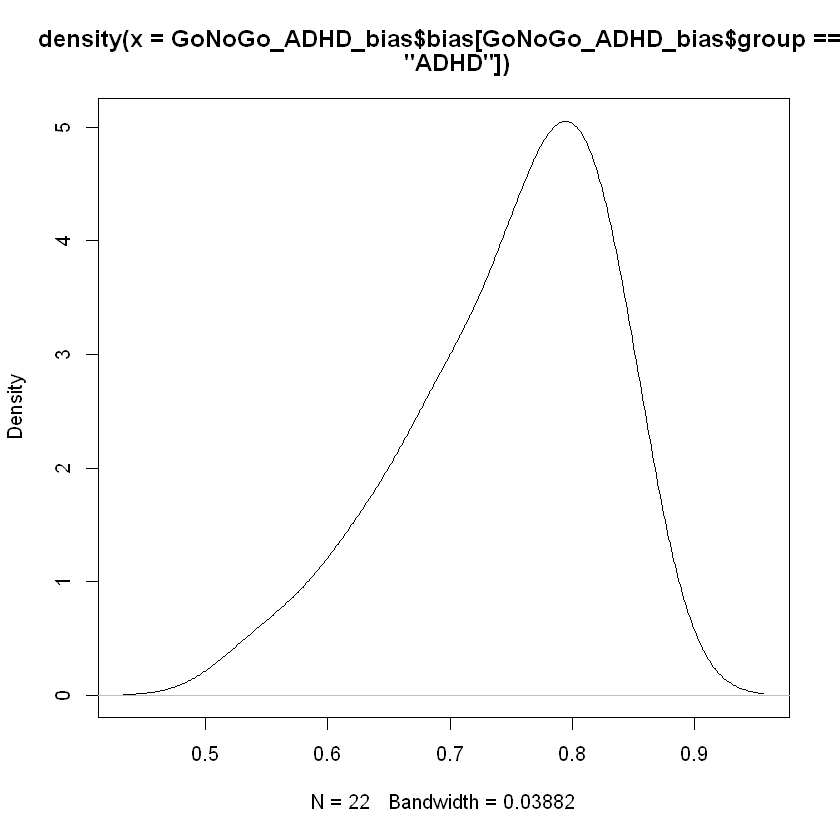

In [42]:
plot(density(GoNoGo_ADHD_bias$bias[GoNoGo_ADHD_bias$group == "ADHD"]))

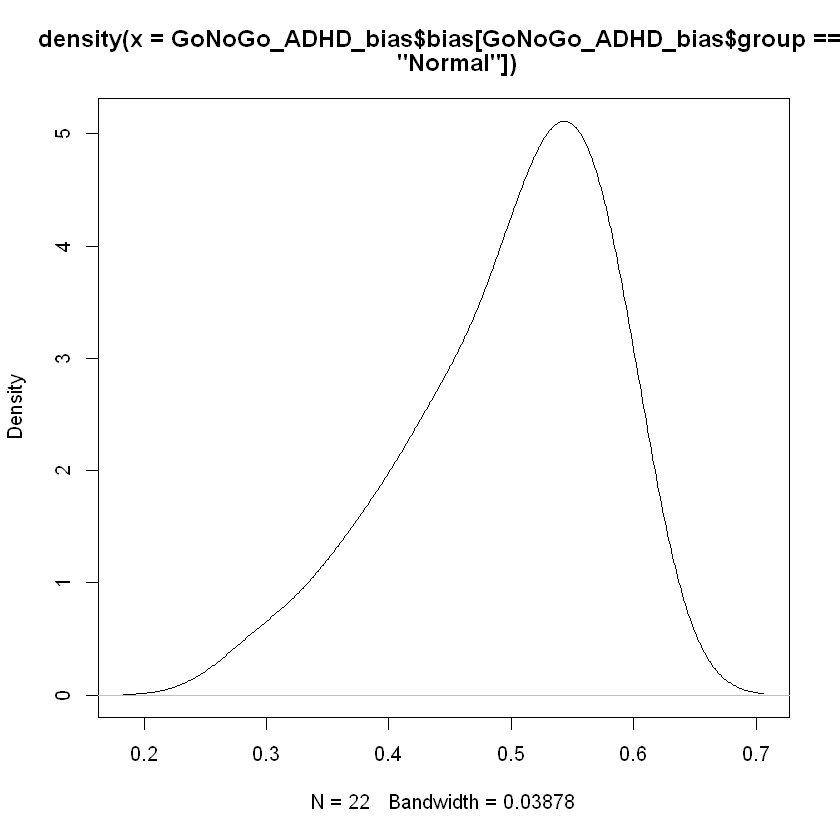

In [43]:
plot(density(GoNoGo_ADHD_bias$bias[GoNoGo_ADHD_bias$group == "Normal"]))

In [45]:
symmetry.test(GoNoGo_ADHD_bias$bias[GoNoGo_ADHD_bias$group == "ADHD"])


	m-out-of-n bootstrap symmetry test by Miao, Gel, and Gastwirth (2006)

data:  GoNoGo_ADHD_bias$bias[GoNoGo_ADHD_bias$group == "ADHD"]
Test statistic = -1.9222, p-value = 0.064
alternative hypothesis: the distribution is asymmetric.
sample estimates:
bootstrap optimal m 
                 14 


In [46]:
symmetry.test(GoNoGo_ADHD_bias$bias[GoNoGo_ADHD_bias$group == "Normal"])


	m-out-of-n bootstrap symmetry test by Miao, Gel, and Gastwirth (2006)

data:  GoNoGo_ADHD_bias$bias[GoNoGo_ADHD_bias$group == "Normal"]
Test statistic = -1.8995, p-value = 0.098
alternative hypothesis: the distribution is asymmetric.
sample estimates:
bootstrap optimal m 
                 20 


In [47]:
GoNoGo_ADHD_bias %>% wilcox_test(bias ~ group)

,.y.,group1,group2,n1,n2,statistic,p
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,bias,ADHD,Normal,22,22,477,3.51e-08


In [48]:
GoNoGo_ADHD_bias %>% wilcox_effsize(bias ~ group)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,bias,ADHD,Normal,0.8330179,22,22,large


## Wilcoxon signed rank test on paied samples
### Two sample dependent t test

In [50]:
GoNoGo_ADHD_bias_PrePo = read_excel("D://Amar//Codes_Data//GoNoGo_ADHD_bias_PrePost.xlsx")

In [51]:
GoNoGo_ADHD_bias_PrePo

id,group,bias
<dbl>,<chr>,<dbl>
1,before,0.73
2,before,0.87
3,before,0.83
4,before,0.82
5,before,0.67
6,before,0.67
7,before,0.88
8,before,0.82
9,before,0.75


In [52]:
GoNoGo_ADHD_bias_PrePo %>% group_by(group) %>% shapiro_test(bias)

group,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
after,bias,0.9029851,0.03412215
before,bias,0.9013495,0.03163484


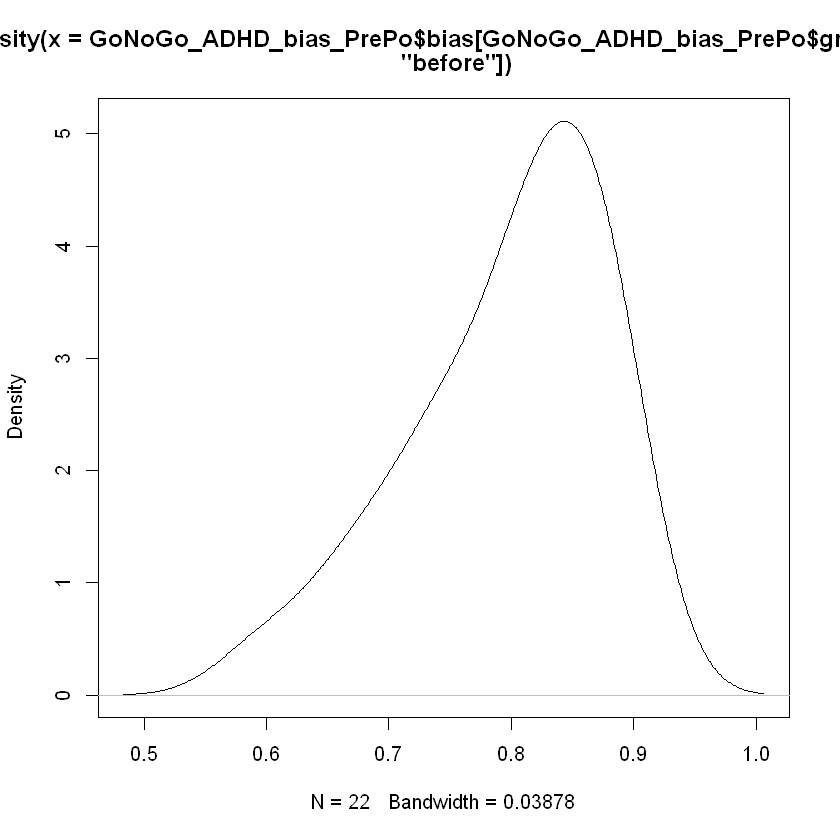

In [53]:
plot(density(GoNoGo_ADHD_bias_PrePo$bias[GoNoGo_ADHD_bias_PrePo$group == "before"]))

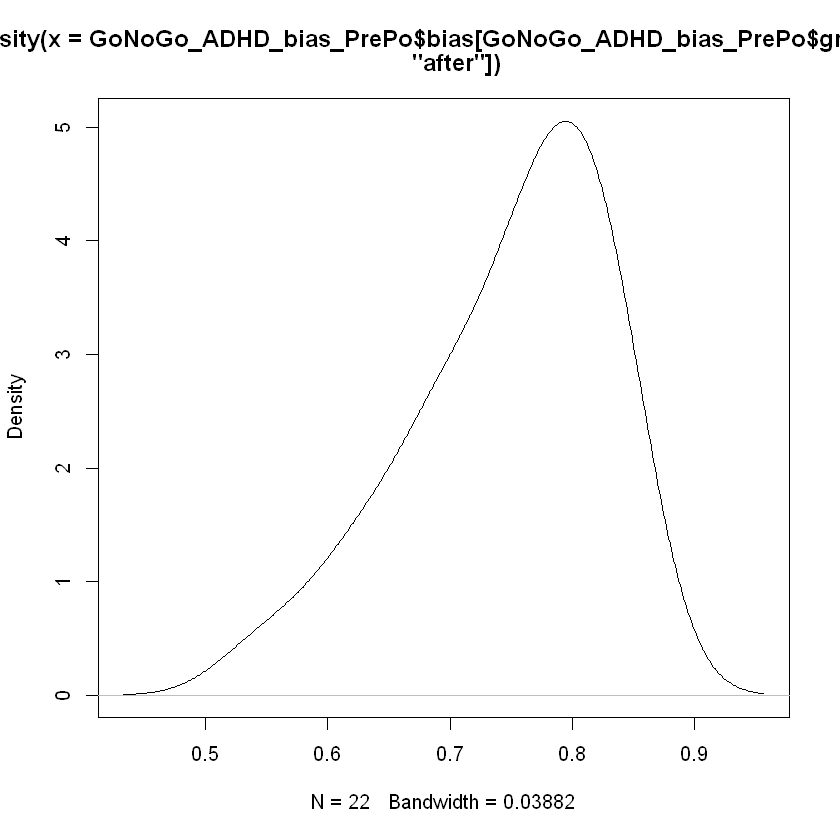

In [54]:
plot(density(GoNoGo_ADHD_bias_PrePo$bias[GoNoGo_ADHD_bias_PrePo$group == "after"]))

In [56]:
symmetry.test(GoNoGo_ADHD_bias_PrePo$bias[GoNoGo_ADHD_bias_PrePo$group == "before"])


	m-out-of-n bootstrap symmetry test by Miao, Gel, and Gastwirth (2006)

data:  GoNoGo_ADHD_bias_PrePo$bias[GoNoGo_ADHD_bias_PrePo$group == "before"]
Test statistic = -1.8995, p-value = 0.112
alternative hypothesis: the distribution is asymmetric.
sample estimates:
bootstrap optimal m 
                 17 


In [57]:
symmetry.test(GoNoGo_ADHD_bias_PrePo$bias[GoNoGo_ADHD_bias_PrePo$group == "after"])


	m-out-of-n bootstrap symmetry test by Miao, Gel, and Gastwirth (2006)

data:  GoNoGo_ADHD_bias_PrePo$bias[GoNoGo_ADHD_bias_PrePo$group == "after"]
Test statistic = -1.9222, p-value = 0.084
alternative hypothesis: the distribution is asymmetric.
sample estimates:
bootstrap optimal m 
                 14 


In [58]:
GoNoGo_ADHD_bias_PrePo %>% wilcox_test(bias ~ group, paired = TRUE)

,.y.,group1,group2,n1,n2,statistic,p
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,bias,after,before,22,22,0,2.69e-05


In [59]:
GoNoGo_ADHD_bias_PrePo %>% wilcox_effsize(bias ~ group, paired = TRUE)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,bias,after,before,0.8986844,22,22,large
